# Сборный проект. Анализ и предсказание продаж по компьютерным играм.

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Откройте файл с данными и изучите общую информацию

In [ ]:
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

подключение библиотек

In [ ]:
data_games = pd.read_csv('/datasets/games.csv')
data_games.info(), data_games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(None,
                        Name Platform  Year_of_Release         Genre  NA_sales  \
 0                Wii Sports      Wii           2006.0        Sports     41.36   
 1         Super Mario Bros.      NES           1985.0      Platform     29.08   
 2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
 3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
 4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   
 
    EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
 0     28.96      3.77         8.45          76.0          8      E  
 1      3.58      6.81         0.77           NaN        NaN    NaN  
 2     12.76      3.79         3.29          82.0        8.3      E  
 3     10.93      3.28         2.95          80.0          8      E  
 4      8.89     10.22         1.00           NaN        NaN    NaN  )

просмотр общей информации

In [ ]:
data_games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


вывод сводной информации о таблице

### Вывод
В данных есть несоответствие типов данных и пропуски.

## Подготовьте данные

In [ ]:
data_games.columns = map(str.lower, data_games.columns)
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


названия столбцов приводим к нижнему регистру

In [ ]:
missing_list = []
for x in data_games:
    if len(data_games[data_games[x].isnull()]) > 0:
        missing_list.append(x)
missing_list

['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']

вывод колонок данных содержащих nan значения

In [ ]:
missing_perc = []
for x in missing_list:
    missing_perc.append([x, (len(data_games[data_games[x].isnull()]) / len(data_games))])
missing_perc=pd.DataFrame(missing_perc, columns=['column', 'missing %'])
missing_perc.sort_values(by=['missing %'], ascending=False)

,column,missing %
3,critic_score,0.513192
5,rating,0.404786
4,user_score,0.400897
1,year_of_release,0.016093
0,name,0.000120
2,genre,0.000120


In [ ]:
data_games.isna().mean().to_frame(name="missing").sort_values(by='missing', ascending=False)

,missing
critic_score,0.513192
rating,0.404786
user_score,0.400897
year_of_release,0.016093
name,0.000120
genre,0.000120
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


<hr style="border: 2px solid orange;" />

вывод колонок с процентами данных содержащих nan значения, пропуски возможно появились из-за того, что данные ошибочно не были введены

In [ ]:
data_games.duplicated().sum()

0

проверка на полные дубликаты

In [ ]:
data_games.groupby(['rating'])['rating'].count()

rating
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: rating, dtype: int64

сводная таблица сгруппированная по количеству рейтингов

Классификация по рейтингу ESRB:

* AO - («Adults Only 18+») — «Только для взрослых»
* E - («Everyone») — «Для всех»
* E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»
* EC - («Early childhood») — «Для детей младшего возраста»
* K - A - (Kids to Adults) rating category changed to E (Everyone)
* M - («Mature») — «Для взрослых»
* RP - («Rating Pending») — «Рейтинг ожидается»
* T - («Teen») — «Подросткам»

In [ ]:
data_games['rating'] = data_games['rating'].fillna('RP')

замена пустых значений на значение RP (Rating Pending Рейтинг ожидается)

In [ ]:
data_games.loc[data_games['rating'] == 'K-A', 'rating'] = 'E'

замена на Е. Так как в рейтинге ESRB: Kids to Adults перевели в Everyone 

In [ ]:
data_games['year_of_release'] = data_games['year_of_release'].fillna(-1)

nan значения в годах на значение -1 для явного обозначения пропуска

In [ ]:
data_games['genre'] = data_games['genre'].fillna('unknown')

в жанрах пустые значения заменили на unknown

In [ ]:
data_games['critic_score'] = data_games['critic_score'].fillna(-1)

пропуски в оценках критиков явно обозначены, как -1

In [ ]:
data_games['user_score'] = data_games['user_score'].fillna(-1)

пропуски в оценках пользователей явно обозначены, как -1

In [ ]:
data_games['name'] = data_games['name'].fillna('unknown')

в названиях пропуски заменено на unknown

In [ ]:
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = 0

значение tbd является нулем

In [ ]:
data_games['user_score'] = data_games['user_score'].astype('float')
data_games['year_of_release'] = pd.to_numeric(data_games['year_of_release'], downcast='integer')
data_games['critic_score'] = pd.to_numeric(data_games['critic_score'], downcast='integer')

преобразование столбца user_score в тип float
преобразование столбцов year_of_release и critic_score в тип int т.к. значения целые числа

In [ ]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int16
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int8
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(5), int16(1), int8(1), object(4)
memory usage: 1.2+ MB


отображение типов данных в таблице 

In [ ]:
data_games['all_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

добавление столбца all_sales с суммарными продажами

### вывод

* тип данных в столбце user_score изменили на float для дальнейших расчетов
* тип данных в столбцах year_of_release и critic_score преобразовали в тип int т.к. значения целые числа

* Пропуски в значениях рейтенга заменили на RP (ожидает оценки). И в рейтинге классификатор K - A заменили на E. Так как он был включен в классификатор E. Присутствие классификатора K - A говорит о устарелых данных в базе.
* Пропуски в значениях года выпуска заменили на явное обозначение -1 для того что бы понимать, что это пустые данные в годах выпуска.
* Пропуски в значениях в жанрах заменили на unknown.
* Пропуски оценки критиков заменили на явное обозначение -1 для наглядности.
* Пропуски в оценках пользователей на явное обозначение -1. А значения tbl (to be announced) заменили на 0. Так как tbl показывает что оценка еще не выставленна.
* Пропуски в названиях игр заменили на unknown.

* добавили столбец all_sales с суммарными продажами

Большенство пропусков связано с некорректной обработкой информации при вводе в базу или же связанно с ошибками при выгрузке данных. Следует сообщить об этом поставщику данных.

## Проведите исследовательский анализ данных

In [ ]:
data_games.groupby(['year_of_release'])['name'].count()

year_of_release
-1        269
 1980       9
 1981      46
 1982      36
 1983      17
 1984      14
 1985      14
 1986      21
 1987      16
 1988      15
 1989      17
 1990      16
 1991      41
 1992      43
 1993      62
 1994     121
 1995     219
 1996     263
 1997     289
 1998     379
 1999     338
 2000     350
 2001     482
 2002     829
 2003     775
 2004     762
 2005     939
 2006    1006
 2007    1197
 2008    1427
 2009    1426
 2010    1255
 2011    1136
 2012     653
 2013     544
 2014     581
 2015     606
 2016     502
Name: name, dtype: int64

подсчет количества выпущенных игр по годам

In [ ]:
data_games = data_games.query('1994 <= year_of_release <= 2016')
data_games.groupby(['year_of_release'])['name'].count()

year_of_release
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

подготовка данных с временным интервалом 1994-2016

In [ ]:
games_top = data_games.groupby(['platform'])['all_sales'].sum().sort_values(ascending=False)
games_top

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: all_sales, dtype: float64

продажи по платформам

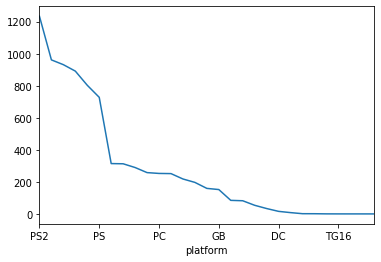

In [ ]:
games_top.plot();

визуализизация суммарных продаж по платформам

In [ ]:
platforms = list(games_top.index[:16])
platforms

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'PC',
 'XB',
 'N64',
 'GC',
 'XOne',
 'GB']

список топ16 платформ с наибольшими продажами с временным интервалом 1994-2016, сформированный не в ручную

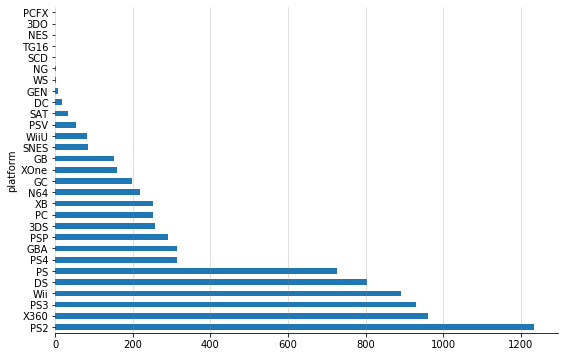

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.despine(left=True)
games_top.plot(kind='barh', ax=ax)
ax.grid(color='grey', alpha=0.5, lw=0.5, axis='x');

Исходя из графика, кажется, что только первые 6 платформ могут оказаться в топе.
<hr style="border: 2px solid green;" />

In [ ]:
data_games = data_games.query('platform == @platforms')

срез по топ платформам в интервале 1994-2016

In [ ]:
data_pivot = data_games.pivot_table('all_sales', ['platform', 'year_of_release'], aggfunc=sum)
data_pivot = data_pivot.reset_index()

сводная таблица по продажам

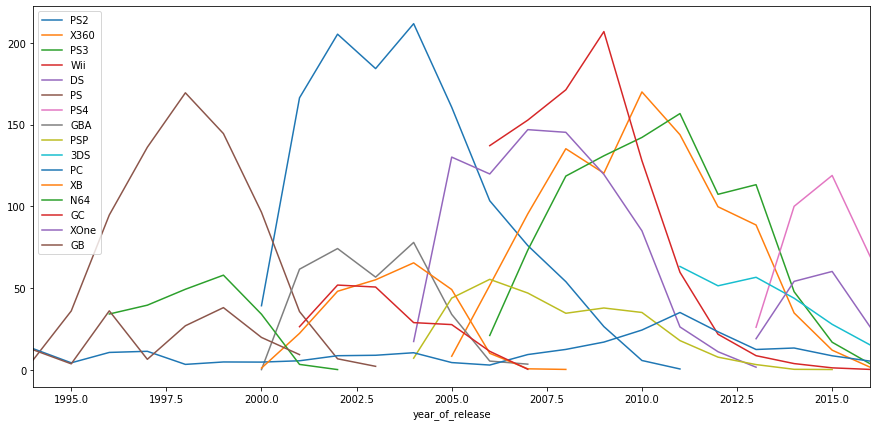

In [ ]:
fig, ax = plt.subplots()
for col in platforms:
    y = data_pivot.query('platform == @col')
    y.plot(x = 'year_of_release', y = 'all_sales', figsize=(15, 7), ax=ax)
ax.legend(platforms);

Поведение продаж на разных игровых платформах в интервале 1994-2016.

В среднем жизненный цикл игровых платформ составляет 7 лет.

In [ ]:
data_actual = data_games.query('2010 <= year_of_release <= 2016')
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,-1,-1.0,RP,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73


Для оценки рынка на 2017 выберем актуальный период 2010 - 2016 года.

In [ ]:
data_actual.groupby(['platform'])['all_sales'].sum().sort_values(ascending=False)

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
PSP      64.05
PS2       6.09
Name: all_sales, dtype: float64

In [ ]:
platforms_actual = ['PS2' ,'PSP', 'PC' ,'DS', 'XOne', 'Wii' ,'3DS', 'PS4', 'X360' ,'PS3' ]

список топ 10 платформ в интервале 2010-2016

In [ ]:
data_actual = data_games.query('platform == @platforms_actual')
data_actual = data_games.pivot_table('all_sales', ['platform', 'year_of_release'], aggfunc=sum)
data_actual = data_actual.reset_index()
data_actual.head()

,platform,year_of_release,all_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78


сводная таблица общих продаж по платформам и году

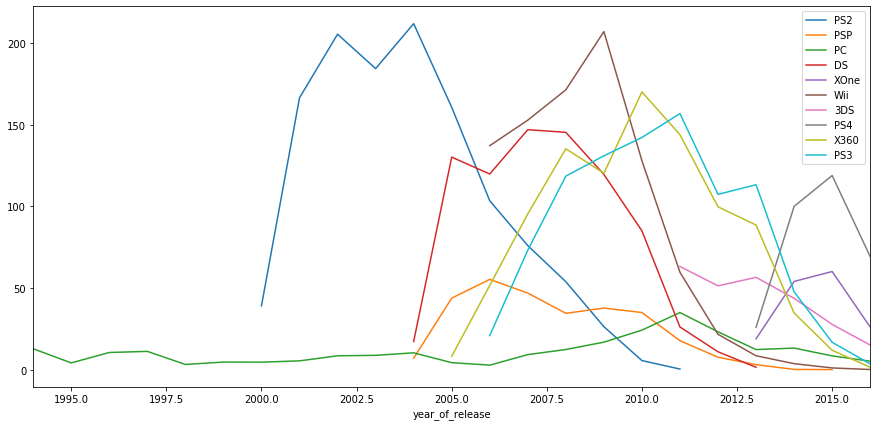

In [ ]:
ax = plt.gca();
for col in platforms_actual:
    y = data_actual.query('platform == @col');
    y.plot(x = 'year_of_release', y = 'all_sales', figsize=(15, 7), ax=ax);
ax.legend(platforms_actual);

Поведение продаж на топ 10 игровых платформах в интервале 2010-2016

Продажи по индустрии падают. XOne и PS4 в топе. Платформа PC самая долгоживущая и стабильная.

In [ ]:
data_10_16 = data_games.query('2010 <= year_of_release <= 2016').loc[(data_games['user_score'] != -1)&(data_games['user_score'] != 0)&(data_games['critic_score'] != -1)]
data_10_16

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87,6.3,M,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,RP,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61,5.8,T,0.01


срез по актуальному периоду

In [ ]:
data_agg = data_10_16.groupby('name')['platform'].count()
data_agg = pd.DataFrame(data_agg)
data_agg.reset_index(inplace=True)
data_agg

,name,platform
0,Tales of Xillia 2,1
1,2010 FIFA World Cup South Africa,4
2,2014 FIFA World Cup Brazil,2
3,7 Days to Die,2
4,7th Dragon III Code: VFD,1
...,...,...
1153,inFAMOUS 2,1
1154,inFAMOUS: Second Son,1
1155,nail'd,2
1156,pro evolution soccer 2011,4


 группировка игр по кроссплатформенности

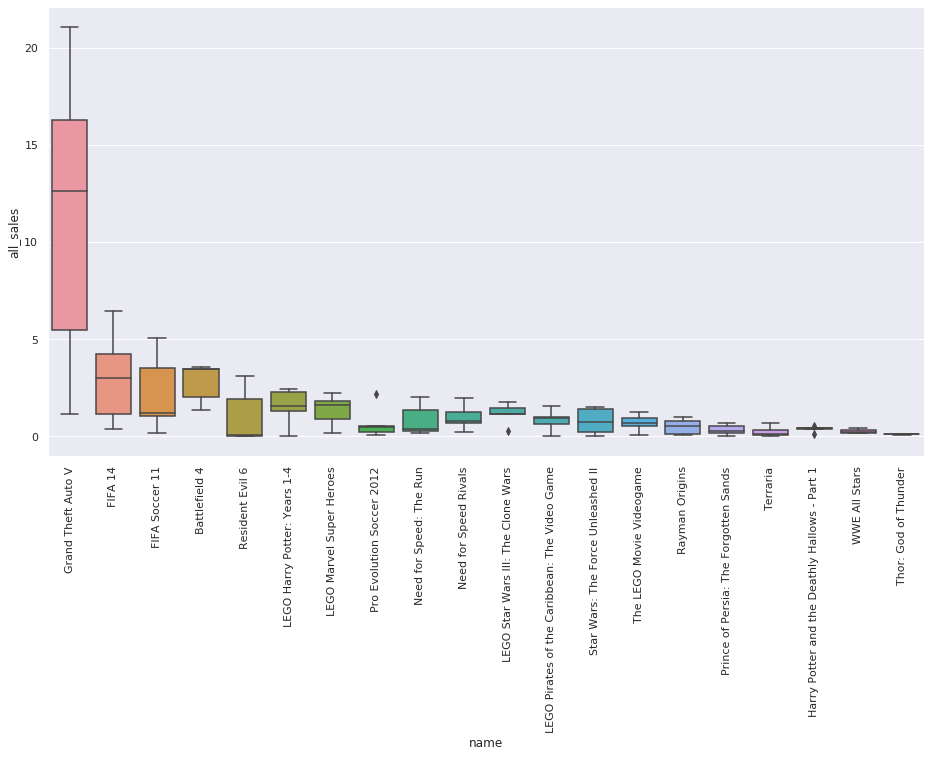

In [ ]:
name_filter = data_agg.query('platform >=5')['name'].values.tolist()
name_filter
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x="name", y="all_sales", data=data_10_16.query('@name_filter in name'))
plt.xticks(rotation=90);

Распределение продаж по 20 многоплатформенным играм:
* Средняя продолжительность жизненного цикла игровой платформы 7 лет.
* Продажи по индустрии падают. XOne и PS4 наиболее перспективны. Платформа PC сама долгоживущая и стабильная.
* По глобальным продажам выделяется серия игр FIFA.
* Среднее значение продаж находиться в диапазоне 1 миллиона.
* Топ 9 многоплотформенных игр приносят прибыль от 2 до 3 миллионов (в среднем 1.5 миллиона) за жизненный цикл.

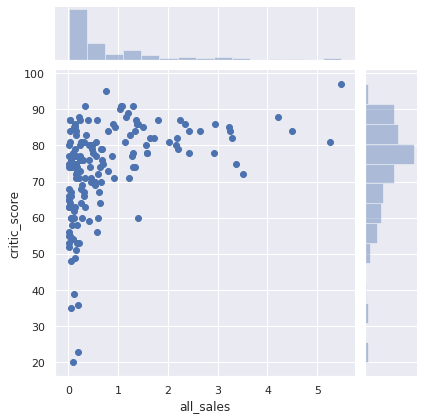

In [ ]:
data_xone = data_10_16.query('platform == @platforms_actual[4]')

sns.jointplot(x='all_sales', y='critic_score', data=data_xone);

Распределение продаж на платформе XOne в зависимости от оценки критиков

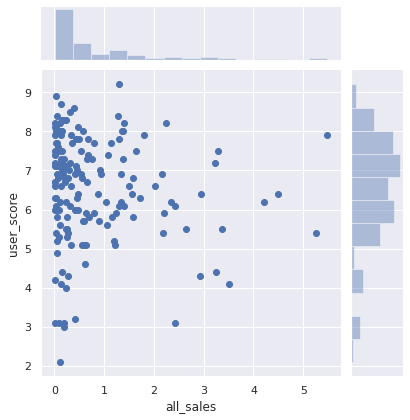

In [ ]:
sns.jointplot(x='all_sales', y='user_score', data=data_xone);

Распределение продаж на платформе XOne в зависимости от оценки пользователей

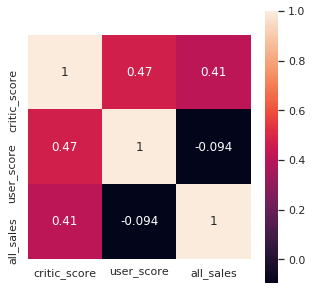

In [ ]:
corr_data = data_xone[['platform', 'critic_score', 'user_score', 'all_sales']].corr()

sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(corr_data, square=True, annot=True);

Зависимость прибыли от оценки критиков и пользователей на платформе XOne

Ситуация по XOne топовой игровой платформе:

* Отзывы критиков сильнее влияют на продажи, чем отзовы пользователей.
* Люди больше доверяют экспертам нежели простым пользователям.
* Мнения экспертов формируют тренды.
* Корреляция ниже 0.5 говорит о небольшом положительном воздействии на продажи.

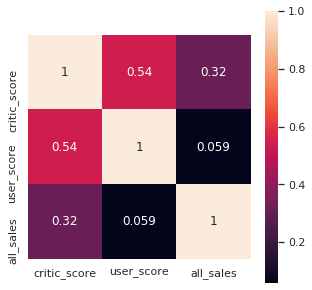

In [ ]:
corr_all = data_10_16[['platform', 'critic_score', 'user_score', 'all_sales']].corr()

sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(corr_all, square=True, annot=True);

Данные платформы в ТОПе на период 2010-2016. Я исследую данные за период, а не только за 2016 год.

In [ ]:
for _ in range(0, 10):
    corr_to_all = data_10_16.query('platform == @platforms_actual[@_]')
    print(platforms_actual[_])
    display(corr_to_all[['platform', 'critic_score', 'user_score', 'all_sales']].corr())

PS2


,critic_score,user_score,all_sales
critic_score,NaN,NaN,NaN
user_score,NaN,NaN,NaN
all_sales,NaN,NaN,NaN


PSP


,critic_score,user_score,all_sales
critic_score,1.000000,0.521908,0.405162
user_score,0.521908,1.000000,0.219262
all_sales,0.405162,0.219262,1.000000


PC


,critic_score,user_score,all_sales
critic_score,1.000000,0.478158,0.336668
user_score,0.478158,1.000000,-0.013300
all_sales,0.336668,-0.013300,1.000000


DS


,critic_score,user_score,all_sales
critic_score,1.000000,0.620256,0.174150
user_score,0.620256,1.000000,0.212029
all_sales,0.174150,0.212029,1.000000


XOne


,critic_score,user_score,all_sales
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
all_sales,0.410422,-0.094003,1.000000


Wii


,critic_score,user_score,all_sales
critic_score,1.000000,0.471698,0.254939
user_score,0.471698,1.000000,0.161277
all_sales,0.254939,0.161277,1.000000


3DS


,critic_score,user_score,all_sales
critic_score,1.000000,0.745222,0.338904
user_score,0.745222,1.000000,0.232089
all_sales,0.338904,0.232089,1.000000


PS4


,critic_score,user_score,all_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
all_sales,0.405895,-0.033625,1.000000


X360


,critic_score,user_score,all_sales
critic_score,1.000000,0.597552,0.336280
user_score,0.597552,1.000000,0.055079
all_sales,0.336280,0.055079,1.000000


PS3


,critic_score,user_score,all_sales
critic_score,1.000000,0.595259,0.393604
user_score,0.595259,1.000000,0.082736
all_sales,0.393604,0.082736,1.000000


При помощи цикла рассчет корреляции продаж с оценками критиков и пользователей отдельно для каждой из платформ.

Платформы кроме 3DS имеют похожие связи, как и у XOne.

Выделяется 3DS, рейтинг игроков кореллируется с рейтингом критиков 0.74 . Возможно здесь идет лучше работа по составлению рейтинга для игр и системы отзывов для игроков.

<a class="anchor" id="21-bullet">

Зависимость прибыли от оценки критиков и пользователей на всех игровых платформах

По игровым платформам данные уже более равномерные. Наблюдается небольшая положительная тенденция в росте продаж. Оценки как экспертов так и обычных пользователей воздействуют на продажи примерно одинаково и положительно.

In [ ]:
# группировка игр по жанрам
data_agg_genre = data_10_16.groupby('genre')['name'].count()
data_agg_genre = pd.DataFrame(data_agg_genre)
data_agg_genre.reset_index(inplace=True)

# группировка продаж по жанрам
data_agg_sum = data_10_16.groupby('genre')['all_sales'].sum()
data_agg_sum = pd.DataFrame(data_agg_sum)
data_agg_sum.reset_index(inplace=True)

# группировка по всем данным
data_all = data_agg_genre.merge(data_agg_sum, on='genre')

# средние продажи по жанрам
data_all['mean'] = data_all['all_sales'] / data_all['name']

data_all.sort_values(by='all_sales', axis = 0)

,genre,name,all_sales,mean
5,Puzzle,16,7.65,0.478125
11,Strategy,70,24.46,0.349429
1,Adventure,79,26.14,0.330886
9,Simulation,71,41.00,0.577465
2,Fighting,109,54.60,0.500917
4,Platform,73,74.57,1.021507
6,Racing,130,87.70,0.674615
3,Misc,105,117.62,1.120190
7,Role-Playing,220,166.74,0.757909
10,Sports,230,223.70,0.972609


* Самые прибыльные платформы Action и Shooter.
* Разнообразие игр в жанре в среднем приносит большую прибыль.

In [ ]:
data_all.sort_values(by='mean', axis = 0)

,genre,name,all_sales,mean
1,Adventure,79,26.14,0.330886
11,Strategy,70,24.46,0.349429
5,Puzzle,16,7.65,0.478125
2,Fighting,109,54.60,0.500917
9,Simulation,71,41.00,0.577465
6,Racing,130,87.70,0.674615
7,Role-Playing,220,166.74,0.757909
0,Action,599,485.05,0.809766
10,Sports,230,223.70,0.972609
4,Platform,73,74.57,1.021507


### Вывод

На 2017 год ожидается подъем продаж по PS4, XOne и 3DS, так как многие студии-разработчики хотят попасть на все рынки.

## Составьте портрет пользователя каждого региона

In [ ]:
# группировка na_sales прибыли по игровым платформам
pl_na = pd.DataFrame(data_10_16.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).head())
pl_na.reset_index(inplace=True)

# группировка eu_sales прибыли по игровым платформам
pl_eu = pd.DataFrame(data_10_16.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).head())
pl_eu.reset_index(inplace=True)

# группировка jp_sales прибыли по игровым платформам
pl_jp = pd.DataFrame(data_10_16.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).head())
pl_jp.reset_index(inplace=True)

pl_na

,platform,na_sales
0,X360,286.03
1,PS3,190.64
2,PS4,84.46
3,XOne,76.03
4,Wii,58.53


топ 5 игровых платформ Северная Америка

In [ ]:
pl_eu

,platform,eu_sales
0,PS3,171.07
1,X360,137.78
2,PS4,112.44
3,PC,60.40
4,XOne,42.23


топ 5 игровых платформ Европа

In [ ]:
pl_jp

,platform,jp_sales
0,PS3,37.69
1,3DS,33.87
2,Wii,10.00
3,PS4,9.43
4,DS,6.46


топ 5 игровых платформ Япония

В целом пользователи Северной Америки и Европы очень похожи по предпочтениям игровых платформ. Япония отличается. Возможно это связано с особым азиатским менталитетом.

In [ ]:
# группировка na_sales прибыли по жанрам
gen_na = pd.DataFrame(data_10_16.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head())
gen_na.reset_index(inplace=True)

# группировка eu_sales прибыли по жанрам
gen_eu = pd.DataFrame(data_10_16.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).head())
gen_eu.reset_index(inplace=True)

# группировка jp_sales прибыли по жанрам
gen_jp = pd.DataFrame(data_10_16.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).head())
gen_jp.reset_index(inplace=True)

gen_na

,genre,na_sales
0,Action,216.68
1,Shooter,200.31
2,Sports,111.09
3,Role-Playing,74.29
4,Misc,66.96


топ 5 жанров Северная Америка

In [ ]:
gen_eu

,genre,eu_sales
0,Action,180.33
1,Shooter,142.31
2,Sports,80.50
3,Role-Playing,49.25
4,Racing,40.64


топ 5 жанров Европа

In [ ]:
gen_jp

,genre,jp_sales
0,Action,28.78
1,Role-Playing,26.83
2,Shooter,10.12
3,Platform,9.98
4,Simulation,7.92


топ 5 жанров Япония

По жанрам предпочтения пользоветелей Европпы и Северной Америки сходятся. Япония опять таки отличается скорее всего из за отличия культуры и азиатской ментальности.

rating,E,E10+,M,RP,T
count,249.000000,195.000000,290.000000,53.000000,393.000000
mean,0.748996,0.586410,1.245448,0.022642,0.350763
std,1.404754,1.068192,2.563835,0.061991,0.602825
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.080000,0.080000,0.090000,0.000000,0.040000
50%,0.260000,0.190000,0.460000,0.000000,0.130000
75%,0.730000,0.520000,1.252500,0.000000,0.420000
max,15.000000,7.750000,23.840000,0.310000,5.860000


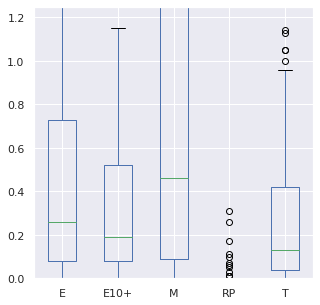

In [ ]:
plt.ylim(0, 1.25)
data_raiting_na = data_10_16.pivot_table(index='name', columns='rating', values='na_sales', aggfunc='sum');
data_raiting_na.boxplot();

data_raiting_na.describe()

Распределение продаж в зависимости от рейтенга в регионе na

rating,E,E10+,M,RP,T
count,249.000000,195.000000,290.000000,53.000000,393.000000
mean,0.615422,0.364462,0.954655,0.074717,0.255191
std,1.389819,0.636108,2.024432,0.149648,0.441070
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.020000,0.070000,0.010000,0.020000
50%,0.160000,0.100000,0.335000,0.030000,0.090000
75%,0.530000,0.370000,0.992500,0.060000,0.270000
max,10.000000,3.700000,23.420000,0.950000,3.400000


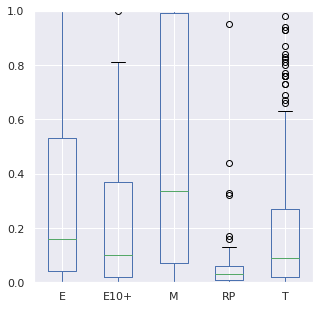

In [ ]:
plt.ylim(0, 1)
data_raiting_eu = data_10_16.pivot_table(index='name', columns='rating', values='eu_sales', aggfunc='sum')
data_raiting_eu.boxplot();

data_raiting_eu.describe()

Распределение продаж в зависимости от рейтенга в регионе eu

rating,E,E10+,M,RP,T
count,249.000000,195.000000,290.000000,53.000000,393.000000
mean,0.156386,0.050154,0.092828,0.016792,0.080254
std,0.460223,0.118776,0.163761,0.055601,0.194996
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.040000,0.000000,0.020000
75%,0.080000,0.030000,0.100000,0.000000,0.090000
max,4.390000,0.790000,1.420000,0.300000,2.620000


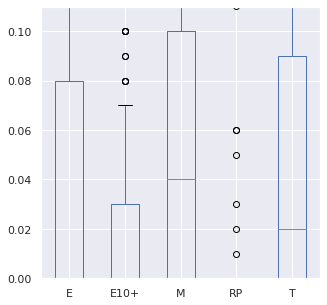

In [ ]:
plt.ylim(0, 0.11)
data_raiting_jp = data_10_16.pivot_table(index='name', columns='rating', values='jp_sales', aggfunc='sum')
data_raiting_jp.boxplot();

data_raiting_jp.describe()

Распределение продаж в зависимости от рейтенга в регионе jp

* В Европе и в Северной америке похожая ситуация по продажам в сетке рейтинга, а у Японии больше продаж игр для подростков.
* В Японии подростки больше увлекаються компьютерными играми и скорее всего это ролевые игры.

### Вывод

* Американский игрок: от 17 лет, любит играть или на PS4, или на XOne, любит игры на реакцию и шутеры. 
* Европейский игрок: от 17 лет, любит играть на PS4, любит игры на реакцию и шутеры. 
* Японский игрок: от 13 лет, любит играть на переносных платформах 3DS или PSV, любит тратить время на RPG и экшены.

In [ ]:
pd.concat([gen_jp,
          gen_eu,
          gen_na], axis=1)

,genre,jp_sales,genre,eu_sales,genre,na_sales
0,Action,28.78,Action,180.33,Action,216.68
1,Role-Playing,26.83,Shooter,142.31,Shooter,200.31
2,Shooter,10.12,Sports,80.50,Sports,111.09
3,Platform,9.98,Role-Playing,49.25,Role-Playing,74.29
4,Simulation,7.92,Racing,40.64,Misc,66.96


<hr style="border: 2px solid orange;" />

## Проверьте гипотезы

In [ ]:
def bootstrap(arr, n=100, N_TRIAL = 1000, func = np.mean):
    res = []
    n = min(len(arr),n)
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        # Делаем подвыборку размера n
        subsample = np.random.choice(arr, size = (n,))
        # рассчитываем статистику
        stat = func(subsample)
        res.append(stat)
    return res # shape (N_TRIAL,)

функция для моделирования эксперимента Центральные предельные теоремы

### Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

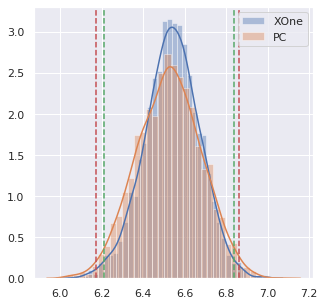

In [ ]:
# распределение по Xbox One
res_xone = bootstrap(data_10_16.query('platform=="XOne"')['user_score'], N_TRIAL = 3000)

# распределение по PC
res_pc = bootstrap(data_10_16.query('platform=="PC"')['user_score'], N_TRIAL = 3000)

# формирование распределений проведенных моделирований
ax = sns.distplot(res_xone, label = 'XOne');
sns.distplot(res_pc, ax = ax, label = 'PC');
ax.legend(['XOne','PC']);
ax.axvline(np.percentile(res_xone,1),linestyle = '--',color='g');
ax.axvline(np.percentile(res_xone,99),linestyle = '--',color='g');
ax.axvline(np.percentile(res_pc,1),linestyle = '--',color='r');
ax.axvline(np.percentile(res_pc,99),linestyle = '--',color='r');

In [ ]:
# подтверждение что они есть
sorted(data_10_16.query('platform=="XOne"')['user_score'].unique())[:5]

[2.1, 3.0, 3.1, 3.2, 4.0]

<hr style="border: 2px solid red;" />

Множества распределений пользовательских рейтенгов по XOne и PC.

Гипотеза 1 верна.

Формулировка нулевой гипотезы H₀: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Исходя из H₀ формулируем альтернативну гипотезу H₁: средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

Альтернативная гипотеза является двухсторонней

p-значение: 0.9170685431405989
Не получилось отвергнуть нулевую гипотезу


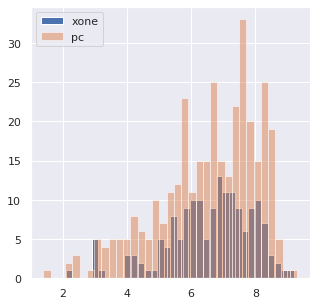

In [ ]:
# срез по платформе XOne и фильтр от не -1 и не 0 значений
user_score_xone = data_10_16.query('platform=="XOne"')['user_score'].loc[(data_10_16['user_score'] != -1)&(data_10_16['user_score'] != 0)]

# срез по платформе PC и фильтр не -1 и не 0 значений
user_score_pc = data_10_16.query('platform=="PC"')['user_score'].loc[(data_10_16['user_score'] != -1)&(data_10_16['user_score'] != 0)]

user_score_xone.hist(bins=35);
user_score_pc.hist(bins=35, alpha=0.5).legend(['xone','pc']);

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    user_score_xone, 
    user_score_pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### вывод

Рейтинги пользователей двух платформ останутся одинаковыми.

### Гипотеза 2: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

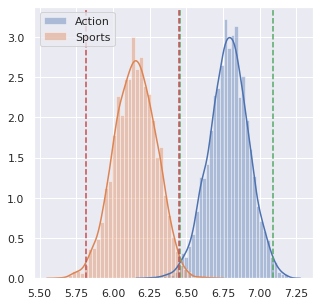

In [ ]:
# распределение по жанру Action
res_action = bootstrap(data_10_16.query('genre=="Action"')['user_score'], N_TRIAL = 3000)

# распределение по жанру Sports
res_sports = bootstrap(data_10_16.query('genre=="Sports"')['user_score'], N_TRIAL = 3000)

# формирование распределений проведенных моделирований
ax = sns.distplot(res_action, label = 'Action');
sns.distplot(res_sports,ax = ax, label = 'Sports');
ax.legend(['Action','Sports']);
ax.axvline(np.percentile(res_action,1),linestyle = '--',color='g');
ax.axvline(np.percentile(res_action,99),linestyle = '--',color='g');
ax.axvline(np.percentile(res_sports,1),linestyle = '--',color='r');
ax.axvline(np.percentile(res_sports,99),linestyle = '--',color='r');

Множества распределений пользовательских рейтенгов по жанрам Action и Sports

Гипотеза 2 не верна.

Основания для выбранной модели эксперимента центральная предельная теорема.

Критерий соответстия для гипотез: визуальное пересечение распределений более чем на 50%

Формулировка нулевой гипотезы H₀: средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

Исходя из H₀ формулируем альтернативну гипотезу H₁: средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Альтернативная гипотеза является двухсторонней

p-значение: 1.5915509197760772e-09
Отвергаем нулевую гипотезу


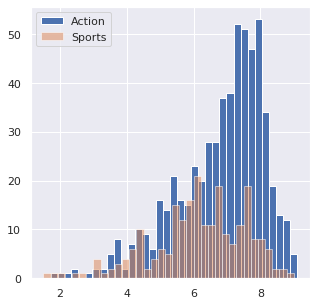

In [ ]:
# срез по жанру Action и фильтр не -1 и не 0 значений
user_score_action = data_10_16.query('genre=="Action"')['user_score'].loc[(data_10_16['user_score'] != -1)&(data_10_16['user_score'] != 0)]

# срез по жанру Sports и фильтр не -1 и не 0 значений
user_score_sports = data_10_16.query('genre=="Sports"')['user_score'].loc[(data_10_16['user_score'] != -1)&(data_10_16['user_score'] != 0)]

# формирование распределений проведенных моделирований
user_score_action.hist(bins=35);
user_score_sports.hist(bins=35, alpha=0.5).legend(['Action','Sports']);


results = st.ttest_ind(
    user_score_action, 
    user_score_sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

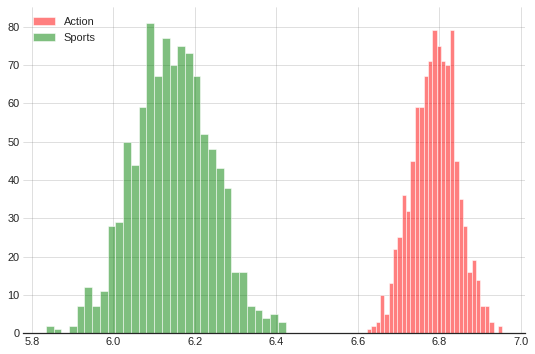

In [ ]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(9, 6))
sns.despine(left=True)
ax.grid(color='grey', alpha=0.5, lw=0.5)
smp1_mean = pd.Series([user_score_action.sample(frac=1, replace=True).mean() for _ in range(1000)])
smp2_mean = pd.Series([user_score_sports.sample(frac=1, replace=True).mean() for _ in range(1000)])
# строим распределения)
ax.hist(smp1_mean, bins=31, label='Action', alpha=0.5, color='red')
ax.hist(smp2_mean, bins=31, label='Sports', alpha=0.5, color='green')
ax.legend();

<hr style="border: 2px solid red;" />

#### Вывод

Рейтинги пользователей жанров Action (англ. «действие») и Sports (англ. «виды спорта») останутся разными.

## Напишите общий вывод

Задача: "Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании."

Закономерности:

* Разработка игр для платформ XOne и PS4 наиболее прибыльна по миру.
* Оценки критиков больше влияют на популярность и как следствие на прибыль. Маркетологам и рекламщикам необходимо обратить внимание на работу с критиками.
* Sports, Role-Playing и Platform приносят больше прибыли за одну игру в среднем.
* Action и Shooter прибыльные жанры если выпускается серия игр.
* Для Северной Америки и Европы прибыльнее делать игры жанра Action на платформах PS3 и X360 с класификацией по ESRB:M
* Для Японии прибыльнее делать игры жанра Role-Playing на платформах 3DS и PS3 с класификацией по ESRB:M и T
* Рейтинги пользователей игровых платформ XOne и PC останутся одинаковыми.
* Пользовательские рейтенги по жанрам Action и Sports останутся разными.